## Load Data from CSVs

In [153]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [154]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_csv('daily_engagement.csv')
enrollments = read_csv('enrollments.csv')
project_submissions = read_csv('project_submissions.csv')

## Fixing Data Types

In [155]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
#     enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', '65'),
             ('is_udacity', True),
             ('is_canceled', True)])

In [156]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [157]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions

[OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
              ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
              ('assigned_rating', 'UNGRADED'),
              ('account_key', '256'),
              ('lesson_key', '3176718735'),
              ('processing_state', 'EVALUATED')]),
 OrderedDict([('creation_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('completion_date', datetime.datetime(2015, 1, 13, 0, 0)),
              ('assigned_rating', 'INCOMPLETE'),
              ('account_key', '256'),
              ('lesson_key', '3176718735'),
              ('processing_state', 'EVALUATED')]),
 OrderedDict([('creation_date', datetime.datetime(2015, 1, 20, 0, 0)),
              ('completion_date', datetime.datetime(2015, 1, 20, 0, 0)),
              ('assigned_rating', 'PASSED'),
              ('account_key', '256'),
              ('lesson_key', '3176718735'),
              ('processing_state', 'EVALUATED')]),
 OrderedDict([('creation_dat

## Problems in the Data

In [20]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
def change_account_key(engagement_table, new_key, old_key):
    for student_daily_engagement in engagement_table:
        student_daily_engagement[new_key] = student_daily_engagement.pop(old_key)
        
change_account_key(daily_engagement, 'account_key','acct')

## Investigating the Data

In [21]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def account_keys(unicodecsv_list):
    keys = set()
    for ordered_dict in unicodecsv_list:
        keys.add(ordered_dict['account_key'])
    return keys

enrollment_num_rows = len(enrollments)             # Replace this with your code
enrollment_num_unique_students = len(account_keys(enrollments))  # Replace this with your code

engagement_num_rows = len(daily_engagement)             # Replace this with your code
engagement_num_unique_students = len(account_keys(daily_engagement))  # Replace this with your code

submission_num_rows = len(project_submissions)             # Replace this with your code
submission_num_unique_students = len(account_keys(project_submissions))  # Replace this with your code

print(enrollment_num_unique_students)
print(engagement_num_unique_students)
print(submission_num_unique_students)

1302
1237
743


## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in account_keys(daily_engagement) and enrollment['join_date'] != enrollment['cancel_date']:
        print (enrollment)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.



## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [22]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [173]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] == '' or int(enrollment['days_to_cancel']) > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students.update({account_key:enrollment_date})
            
        
len(paid_students)

995

## Getting Data from First Week

In [174]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [200]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    
    return new_data

paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

paid_engagement_in_first_week = []

for engagement in non_udacity_engagement:
    if engagement['account_key'] in paid_students.keys() and within_one_week(paid_students[engagement['account_key']], engagement['utc_date']):
        paid_engagement_in_first_week.append(engagement)
        
len(paid_engagement_in_first_week)

1293
134549
3618
OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])


## Exploring Student Engagement

In [187]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_by(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
# print(engagement_by_account['447'])
engagement_by_account = group_by(paid_engagement_in_first_week,'account_key')

In [188]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def sum_grouped_data(data, field_name):
    summed_data = {}
    for key, data_points in data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_data(engagement_by_account, 'total_minutes_visited')

In [189]:
import numpy as np

def print_statistics(data):
    # Summarize the data about minutes spent in the classroom
    values_list = list(data.values())
    print ('Mean: ', np.mean(values_list))
    print ('Standard deviation:', np.std(values_list))
    print ('Minimum:', np.min(values_list))
    print ('Maximum:', np.max(values_list))

## Debugging Data Analysis Code

In [190]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

# for account_key, engagement_for_student in total_minutes_by_account.items():
#     if engagement_for_student == 10568.100867332541:
#         print(engagement_by_account[account_key])

for engagement in engagement_by_account['108']:
    print(engagement)

OrderedDict([('utc_date', datetime.datetime(2015, 4, 20, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 25.9137858334), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 4, 21, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 3.40682316667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 4, 22, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 99.1186611667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 4, 23, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 35.8316206667), ('lessons_completed', 0), ('projects_completed', 2), ('account_key', '108'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 4, 24, 0, 0)), ('n

## Lessons Completed in First Week

In [191]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.


total_lessons_by_account = sum_grouped_data(engagement_by_account, 'lessons_completed')
print_statistics(total_lessons_by_account)

Mean:  1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [192]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

# Summarize the data about minutes spent in the classroom
for account_key, engagement_record in engagement_by_account.items():
    for engagement in engagement_record:
        if engagement['num_courses_visited'] > 0:
            engagement.update({'has_visited': 1})
        else:
            engagement.update({'has_visited': 0})

engagement_by_account = group_by(paid_engagement_in_first_week,'account_key')
total_has_visited = sum_grouped_data(engagement_by_account, 'has_visited')
print_statistics(total_has_visited)

Mean:  2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [199]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_submissions = set()
passing_engagement = []
non_passing_engagement = []

for submission in paid_submissions:
    rating = submission['assigned_rating']
    lesson = submission['lesson_key']
    if (lesson in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION'):
            pass_subway_submissions.add(submission['account_key'])

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_subway_submissions:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

    
print(len(non_passing_engagement))
print(len(passing_engagement))

2392
4527


## Comparing the Two Student Groups

In [228]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

def pass_vs_non_pass(data, metric):
    grouped_data = group_by(data,'account_key')
    sum_data = sum_grouped_data(grouped_data, metric)
    return sum_data.values()


pass_total_minutes_visited = pass_vs_non_pass(passing_engagement, 'total_minutes_visited')
non_pass_total_minutes_visited = pass_vs_non_pass(non_passing_engagement, 'total_minutes_visited')
pass_lessons_completed = pass_vs_non_pass(passing_engagement, 'lessons_completed')
non_pass_lessons_completed = pass_vs_non_pass(non_passing_engagement, 'lessons_completed')
pass_days_visited = pass_vs_non_pass(passing_engagement, 'has_visited')
non_pass_days_visited = pass_vs_non_pass(non_passing_engagement, 'has_visited')

## Making Histograms

(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

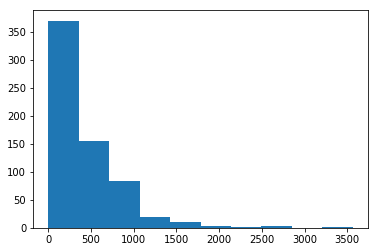

In [231]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt

plt.hist(pass_total_minutes_visited)


Text(0.5, 1.0, 'Total Minutes Visited for Non-Passing Students')

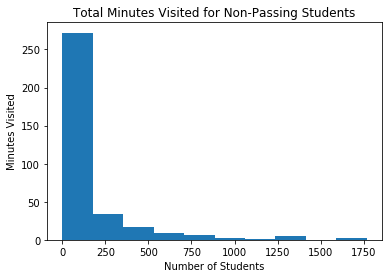

In [239]:
plt.hist(non_pass_total_minutes_visited)
plt.xlabel("Number of Students")
plt.ylabel("Minutes Visited")
plt.title("Total Minutes Visited for Non-Passing Students")

(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

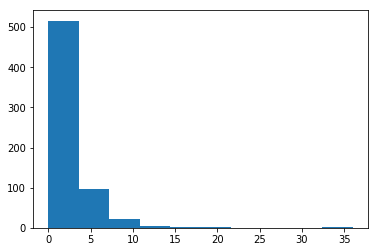

In [233]:
plt.hist(pass_lessons_completed)

(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

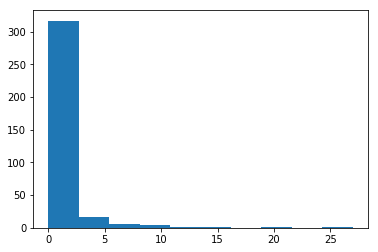

In [234]:
plt.hist(non_pass_lessons_completed)

(array([87., 82., 79.,  0., 91., 77.,  0., 85., 78., 68.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

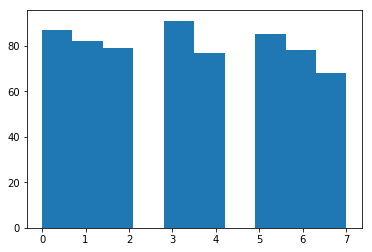

In [235]:
plt.hist(pass_days_visited)

(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

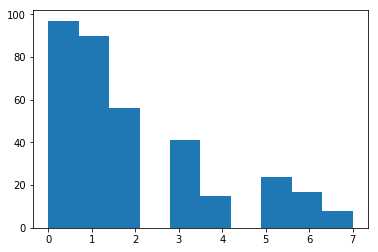

In [236]:
plt.hist(non_pass_days_visited)

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.